# EDA of frames 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from tqdm.notebook import tqdm

plt.style.use("seaborn-colorblind")

In [2]:
# Install nb_black for autoformatting
!pip install nb_black --quiet
%load_ext lab_black

### Data EDA

In [3]:
BASE_DIR = "/Users/kirafriedrichs/neuefische/Capstone_Project_SignMeUp/data/asl-signs/"

# import csv file
train = pd.read_csv(f"{BASE_DIR}/train.csv")
train.head()

path  participant_id  sequence_id  \
0  train_landmark_files/26734/1000035562.parquet           26734   1000035562   
1  train_landmark_files/28656/1000106739.parquet           28656   1000106739   
2   train_landmark_files/16069/100015657.parquet           16069    100015657   
3  train_landmark_files/25571/1000210073.parquet           25571   1000210073   
4  train_landmark_files/62590/1000240708.parquet           62590   1000240708   

    sign  
0   blow  
1   wait  
2  cloud  
3   bird  
4   owie

In [4]:
train.shape

(94477, 4)

In [5]:
train[["sign", "participant_id"]].groupby("sign").count().sort_values(
    by="participant_id"
)

participant_id
sign                  
zipper             299
vacuum             307
beside             310
person             312
dance              312
...                ...
mouse              408
donkey             410
shhh               411
look               414
listen             415

[250 rows x 1 columns]

In [6]:
signs = train["sign"].unique()
signs = signs.tolist()
type(signs)

list

So, 250 unique signs, 299-415 examples of each sign

<AxesSubplot:ylabel='sign'>

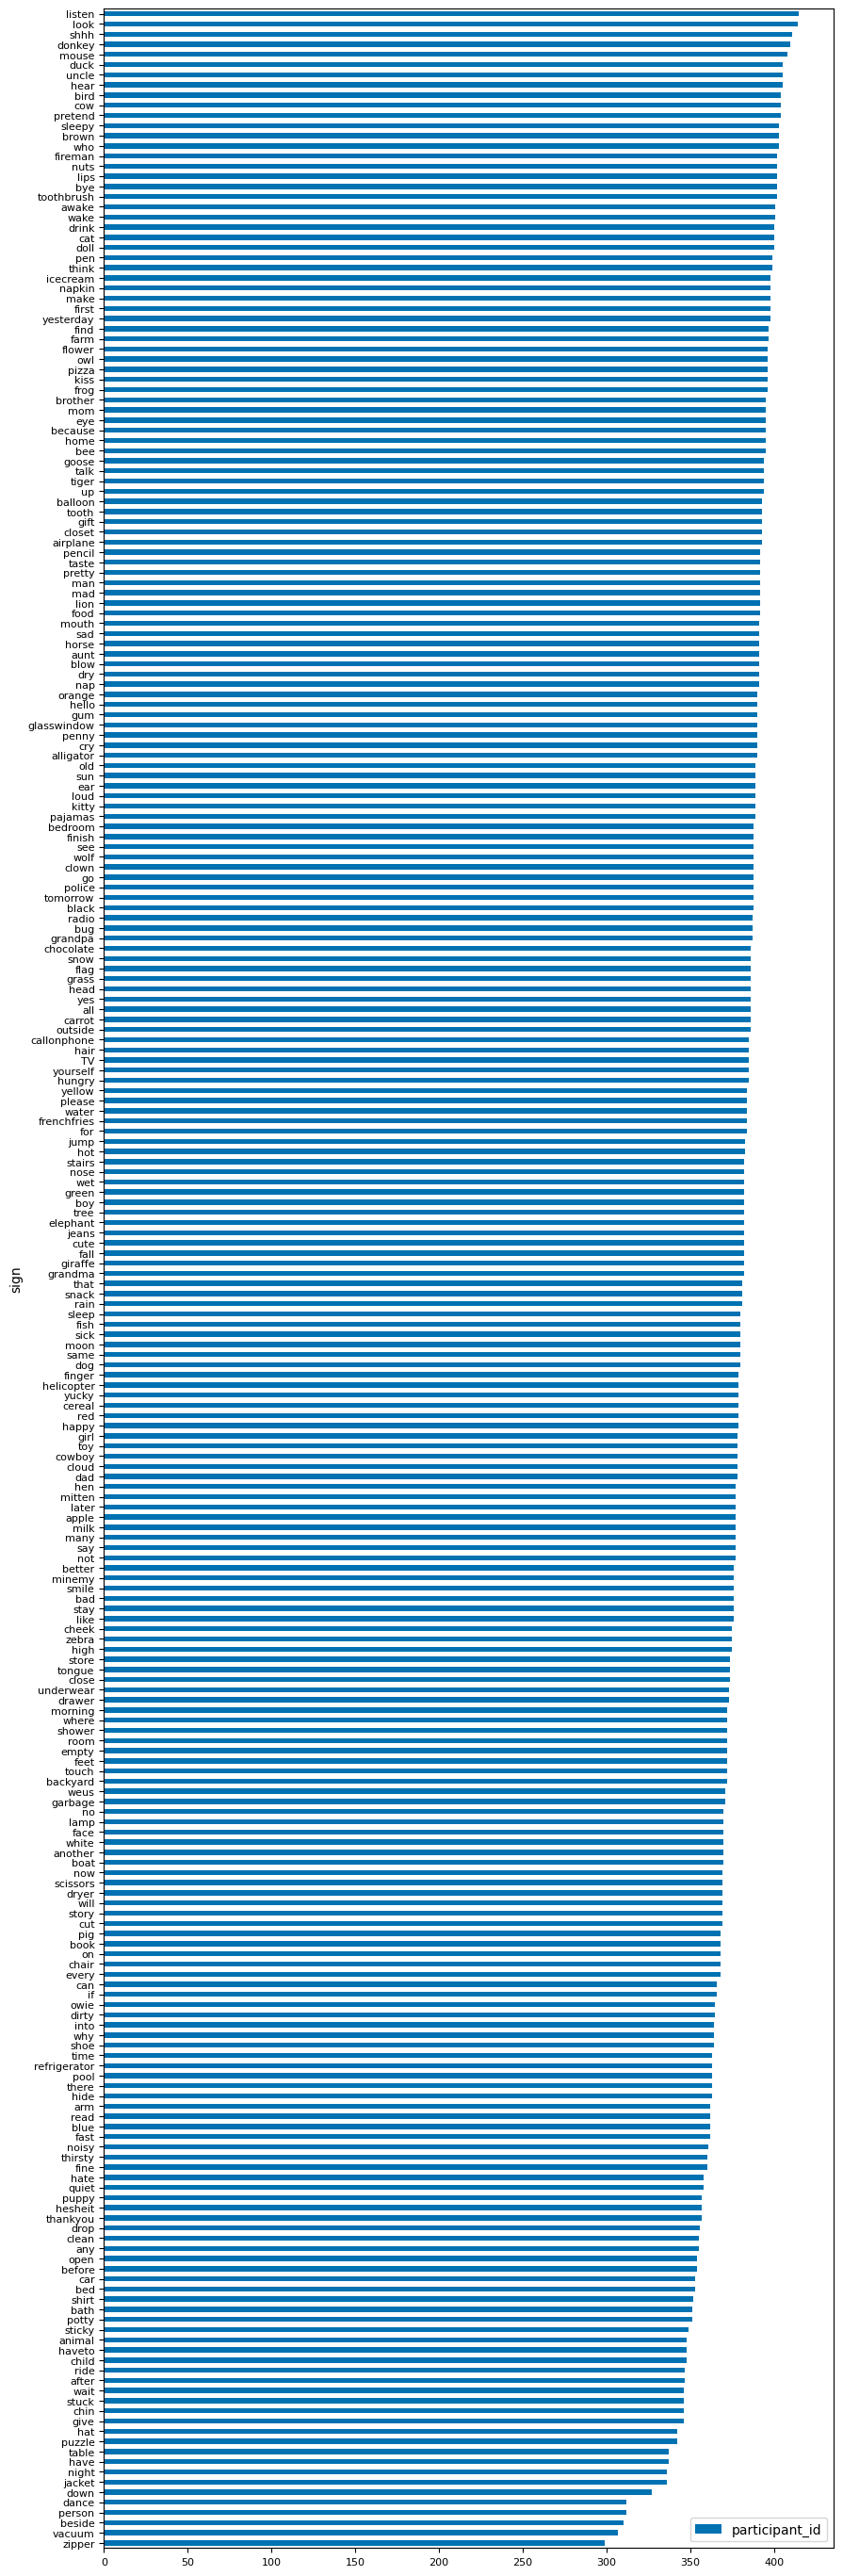

In [8]:
train[["sign", "participant_id"]].groupby("sign").count().sort_values(
    by="participant_id"
).plot(kind="barh", figsize=(10, 35), fontsize=8)

In [9]:
# check for duplicates
train.duplicated().sum()

0

In [10]:
train[["participant_id", "sign"]].groupby("participant_id").count().sort_values(
    by="sign"
)

sign
participant_id      
30680           3338
4718            3499
18796           3502
25571           3865
27610           4275
34503           4545
28656           4563
62590           4563
37055           4648
53618           4656
22343           4677
29302           4722
32319           4753
37779           4782
2044            4810
55372           4826
26734           4841
16069           4848
36257           4896
61333           4900
49445           4968

So the participants in total did between 3338 - 4968 takes for those 250 signs. 

<AxesSubplot:ylabel='sign'>

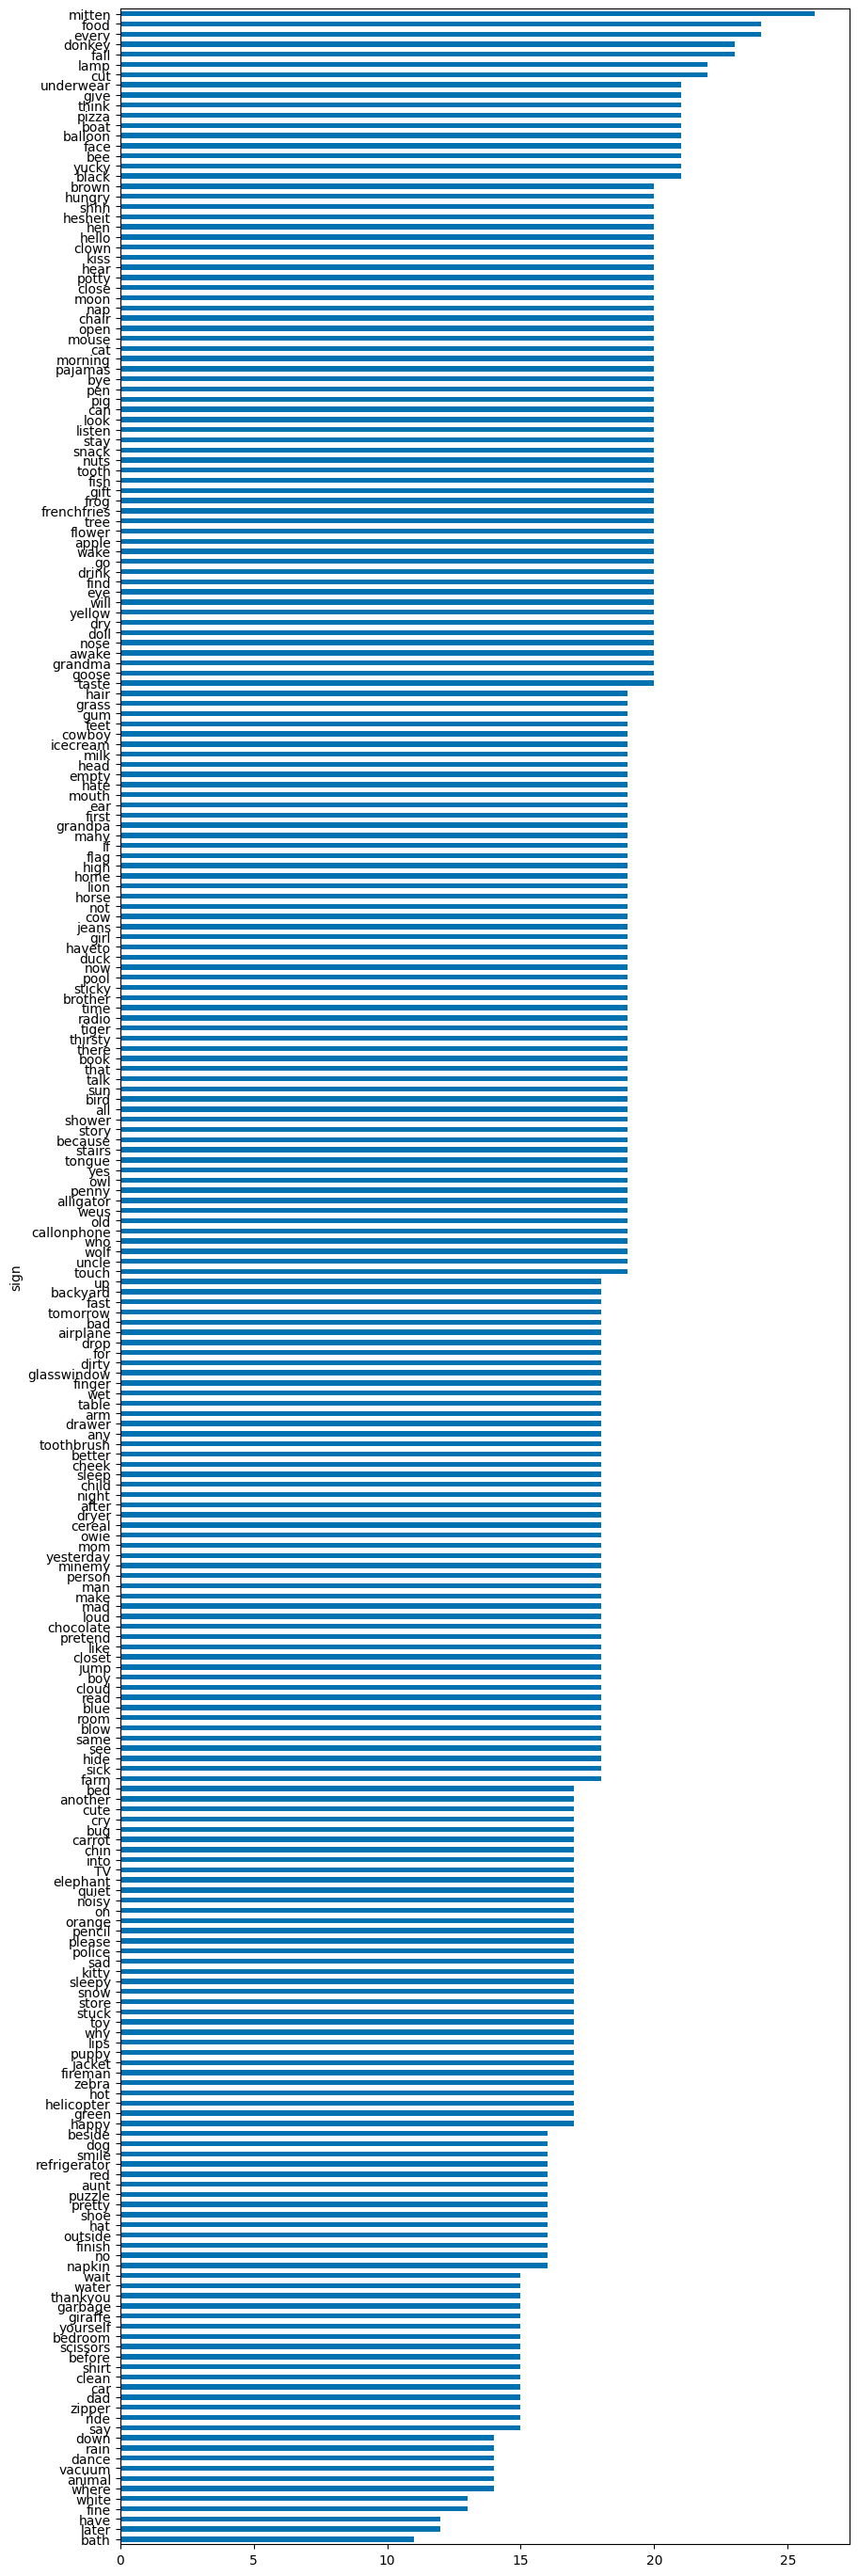

In [11]:
train[train["participant_id"] == 28656].groupby("sign").size().sort_values().plot(
    kind="barh", figsize=(10, 35)
)

<AxesSubplot:ylabel='sign'>

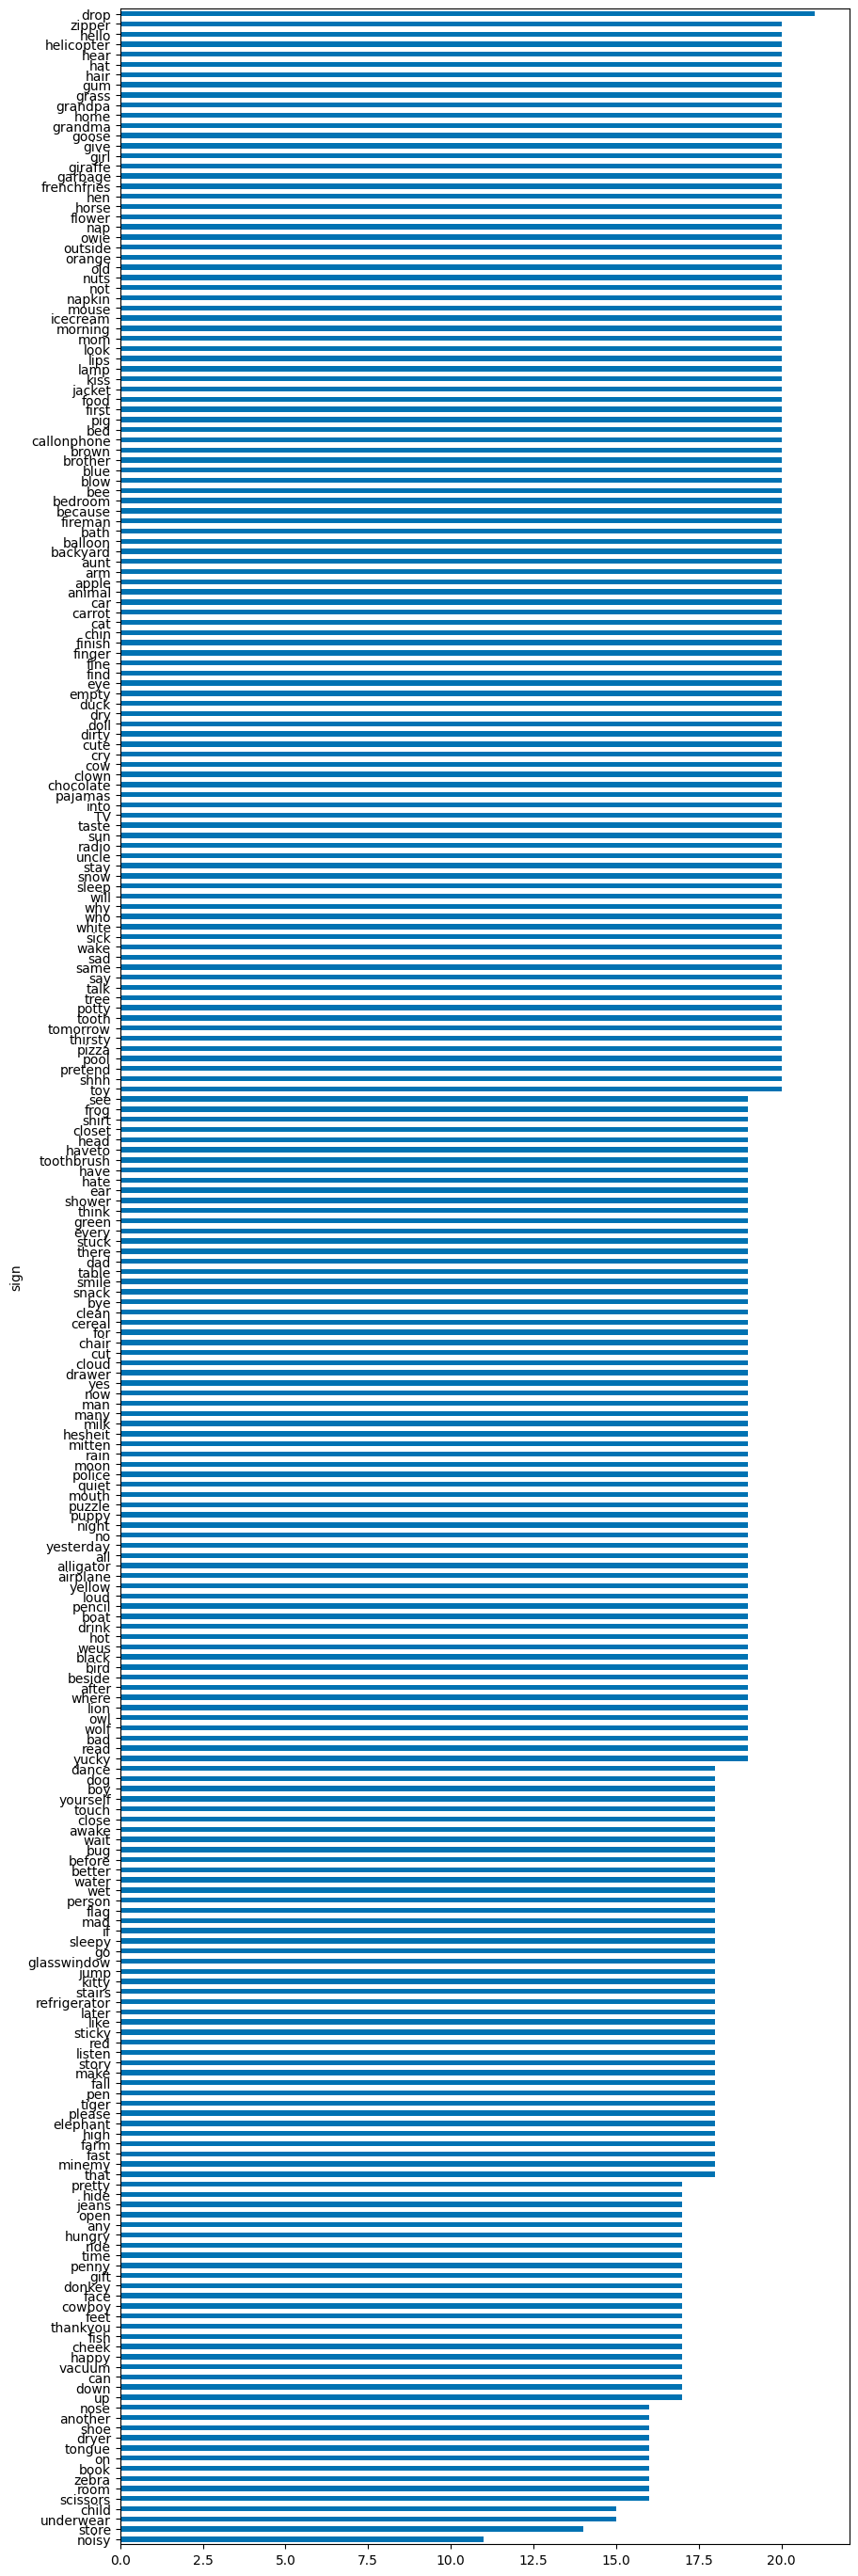

In [12]:
train[train["participant_id"] == 29302].groupby("sign").size().sort_values().plot(
    kind="barh", figsize=(10, 35)
)

# Parquet files

Each parquet file is in the path:
    * train_landmark_files/[participant_id]/[sequence_id].parquet
    * the parquet's associated sign can be found in train.csv

example parquet file data:

pulling an example landmark file for the sign 'listen'

In [13]:
# So here we check the train.csv path and sign columns. We look for those rows with "listen" and check the paths (depending of what we put into 'value' we can access the parquet file)
exam_filename = train.query('sign == "listen"')["path"].values[
    0
]  # vor values I can put 0-414, because we have 415 values for 'listen'/'listen' has been signed 415 times
# so now we load the first parquet file that is referring to the sign 'listen'
example_landmark = pd.read_parquet(f"{BASE_DIR}/{exam_filename}")
example_landmark.head()

frame     row_id  type  landmark_index         x         y         z
0     35  35-face-0  face               0  0.556969  0.431919 -0.039614
1     35  35-face-1  face               1  0.548688  0.394788 -0.077306
2     35  35-face-2  face               2  0.548806  0.405519 -0.040327
3     35  35-face-3  face               3  0.531849  0.356302 -0.058683
4     35  35-face-4  face               4  0.547539  0.382894 -0.082544

In [14]:
example_landmark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3258 entries, 0 to 3257
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   frame           3258 non-null   int16  
 1   row_id          3258 non-null   object 
 2   type            3258 non-null   object 
 3   landmark_index  3258 non-null   int16  
 4   x               3027 non-null   float64
 5   y               3027 non-null   float64
 6   z               3027 non-null   float64
dtypes: float64(3), int16(2), object(2)
memory usage: 140.1+ KB


In [15]:
example_landmark.head()

frame     row_id  type  landmark_index         x         y         z
0     35  35-face-0  face               0  0.556969  0.431919 -0.039614
1     35  35-face-1  face               1  0.548688  0.394788 -0.077306
2     35  35-face-2  face               2  0.548806  0.405519 -0.040327
3     35  35-face-3  face               3  0.531849  0.356302 -0.058683
4     35  35-face-4  face               4  0.547539  0.382894 -0.082544

In [16]:
example_landmark.tail()

frame            row_id        type  landmark_index         x         y  \
3253     40  40-right_hand-16  right_hand              16  0.177520  0.536142   
3254     40  40-right_hand-17  right_hand              17  0.065610  0.493125   
3255     40  40-right_hand-18  right_hand              18  0.096587  0.491917   
3256     40  40-right_hand-19  right_hand              19  0.125879  0.520035   
3257     40  40-right_hand-20  right_hand              20  0.135349  0.536520   

             z  
3253 -0.034433  
3254 -0.047778  
3255 -0.064403  
3256 -0.051628  
3257 -0.038497

In [17]:
example_landmark[example_landmark["type"] == "face"].tail(50)

frame       row_id  type  landmark_index         x         y         z
3133     40  40-face-418  face             418  0.600032  0.456454 -0.014583
3134     40  40-face-419  face             419  0.559348  0.323230 -0.042665
3135     40  40-face-420  face             420  0.581750  0.346599 -0.034833
3136     40  40-face-421  face             421  0.578723  0.463802 -0.024123
3137     40  40-face-422  face             422  0.630154  0.434467  0.004277
3138     40  40-face-423  face             423  0.611854  0.375543 -0.010754
3139     40  40-face-424  face             424  0.616441  0.446878 -0.004966
3140     40  40-face-425  face             425  0.644381  0.371720 -0.003512
3141     40  40-face-426  face             426  0.625604  0.386087 -0.008792
3142     40  40-face-427  face             427  0.656825  0.389477  0.006550
3143     40  40-face-428  face             428  0.584733  0.476805 -0.023831
3144     40  40-face-429  face             429  0.590662  0.352804 -0.025204
3145     40  40-face-430  face             430  0.642113  0.442282  0.017233
3146     40  40-face-431  face             431  0.624849  0.455516  0.005231
3147     40  40-face-432  face             432  0.641466  0.419950  0.008035
3148     40  40-face-433  face             433  0.686281  0.392783  0.057839
3149     40  40-face-434  face             434  0.658446  0.420493  0.022547
3150     40  40-face-435  face             435  0.690239  0.401313  0.090388
3151     40  40-face-436  face             436  0.637059  0.400024 -0.002417
3152     40  40-face-437  face             437  0.579474  0.336380 -0.023958
3153     40  40-face-438  face             438  0.583245  0.369198 -0.057598
3154     40  40-face-439  face             439  0.591865  0.371618 -0.042388
3155     40  40-face-440  face             440  0.576246  0.361722 -0.067260
3156     40  40-face-441  face             441  0.585921  0.281543  0.002972
3157     40  40-face-442  face             442  0.608473  0.272290  0.001760
3158     40  40-face-443  face             443  0.628980  0.269654  0.003518
3159     40  40-face-444  face             444  0.646022  0.271482  0.009985
3160     40  40-face-445  face             445  0.657761  0.276940  0.019132
3161     40  40-face-446  face             446  0.665147  0.298479  0.040209
3162     40  40-face-447  face             447  0.699708  0.327185  0.102968
3163     40  40-face-448  face             448  0.656031  0.315362  0.026802
3164     40  40-face-449  face             449  0.642218  0.319399  0.017615
3165     40  40-face-450  face             450  0.623970  0.320266  0.011096
3166     40  40-face-451  face             451  0.606324  0.318473  0.007471
3167     40  40-face-452  face             452  0.592357  0.315416  0.007615
3168     40  40-face-453  face             453  0.582526  0.311978  0.006593
3169     40  40-face-454  face             454  0.698045  0.328253  0.158724
3170     40  40-face-455  face             455  0.591434  0.374746 -0.035464
3171     40  40-face-456  face             456  0.571137  0.339160 -0.045725
3172     40  40-face-457  face             457  0.573002  0.370596 -0.068940
3173     40  40-face-458  face             458  0.565481  0.377129 -0.063623
3174     40  40-face-459  face             459  0.573065  0.372704 -0.062093
3175     40  40-face-460  face             460  0.587515  0.378487 -0.030937
3176     40  40-face-461  face             461  0.562933  0.378377 -0.067513
3177     40  40-face-462  face             462  0.561265  0.381262 -0.050937
3178     40  40-face-463  face             463  0.582369  0.302691  0.014301
3179     40  40-face-464  face             464  0.574538  0.305663  0.005303
3180     40  40-face-465  face             465  0.569842  0.307729 -0.004622
3181     40  40-face-466  face             466  0.646944  0.293851  0.024180
3182     40  40-face-467  face             467  0.656458  0.287354  0.025320

In [18]:
example_landmark.groupby("type").count()

frame  row_id  landmark_index     x     y     z
type                                                       
face         2808    2808            2808  2808  2808  2808
left_hand     126     126             126     0     0     0
pose          198     198             198   198   198   198
right_hand    126     126             126    21    21    21

In [19]:
unique_frames = example_landmark["frame"].nunique()
unique_types = example_landmark["type"].nunique()
types_in_video = example_landmark["type"].unique()
print(
    f"the file has {unique_frames} unique frames and {unique_types} unique types: {types_in_video}"
)

the file has 6 unique frames and 4 unique types: ['face' 'left_hand' 'pose' 'right_hand']


So in each parquet, we have all the landmark information for all types of signs (face, pose, right hand, left hand), which turns out in 542 rows. Each type has its own landmark-numbers, (hands 0-20, pose 0-33, face 0-467 ) 

Now let's loop this through the parquets and see how many frames each parquet file for the word 'listen' has

In [20]:
listen_files = train.query('sign == "listen"')["path"].values
frame_info = pd.DataFrame()

for i, f in enumerate(listen_files):
    example_landmark = pd.read_parquet(f"{BASE_DIR}/{f}")
    unique_frames = example_landmark["frame"].nunique()
    unique_types = example_landmark["type"].nunique()
    types_in_video = example_landmark["type"].unique()

    temp = pd.DataFrame(
        {
            "parquet_file": f,
            "unique_frames": unique_frames,
            "unique_types": unique_types,
            "types": types_in_video,
        }
    )
    frame_info = pd.concat([frame_info, temp])

In [21]:
frame_info.head()

parquet_file  unique_frames  unique_types  \
0  train_landmark_files/37055/1011397240.parquet              6             4   
1  train_landmark_files/37055/1011397240.parquet              6             4   
2  train_landmark_files/37055/1011397240.parquet              6             4   
3  train_landmark_files/37055/1011397240.parquet              6             4   
0   train_landmark_files/55372/101697989.parquet             23             4   

        types  
0        face  
1   left_hand  
2        pose  
3  right_hand  
0        face

The duration of the parquet files is not consistent. Here it goes from only 6 frames to 224 frames. 
We should think of: How much is 6 frames, really? 

In [22]:
for s in signs:
    word_files = train.query("sign == @s")["path"].values
    print(word_files)

['train_landmark_files/26734/1000035562.parquet'
 'train_landmark_files/2044/1002092995.parquet'
 'train_landmark_files/26734/1008843441.parquet'
 'train_landmark_files/55372/1028804567.parquet'
 'train_landmark_files/16069/1031724967.parquet'
 'train_landmark_files/36257/1052304950.parquet'
 'train_landmark_files/29302/1061460539.parquet'
 'train_landmark_files/53618/1068322729.parquet'
 'train_landmark_files/22343/1107851571.parquet'
 'train_landmark_files/2044/1111383009.parquet'
 'train_landmark_files/25571/1131047553.parquet'
 'train_landmark_files/26734/1134422341.parquet'
 'train_landmark_files/37779/1134597784.parquet'
 'train_landmark_files/22343/1142451118.parquet'
 'train_landmark_files/32319/1150286950.parquet'
 'train_landmark_files/2044/115719649.parquet'
 'train_landmark_files/28656/1193163285.parquet'
 'train_landmark_files/25571/1197406267.parquet'
 'train_landmark_files/49445/1207914549.parquet'
 'train_landmark_files/49445/1214286732.parquet'
 'train_landmark_files/2

In [23]:
## trying to wrap a loop around the previous loop that will just change the sign in every iteration
## doesn't work though

frame_info = pd.DataFrame()
for s in signs:
    word_files = train.query("sign == @s")[
        "path"
    ].values  # the @ symbol is used to indicate that s should be treated as a variable that should be substituted with its value.

    for i, f in enumerate(word_files):
        example_landmark = pd.read_parquet(f"{BASE_DIR}/{f}")
        unique_frames = example_landmark["frame"].nunique()
        unique_types = example_landmark["type"].nunique()

        temp = pd.DataFrame(
            {
                "parquet_file": f,
                "unique_frames": unique_frames,
                "unique_types": unique_types,
                "sign": s,
            },
            index=[0],
        )
        frame_info = pd.concat([frame_info, temp])

In [24]:
frame_info.head()

parquet_file  unique_frames  unique_types  \
0  train_landmark_files/26734/1000035562.parquet             23             4   
0   train_landmark_files/2044/1002092995.parquet              6             4   
0  train_landmark_files/26734/1008843441.parquet             10             4   
0  train_landmark_files/55372/1028804567.parquet             24             4   
0  train_landmark_files/16069/1031724967.parquet            151             4   

   sign  
0  blow  
0  blow  
0  blow  
0  blow  
0  blow

In [32]:
frame_descr = frame_info.groupby("sign")["unique_frames"].describe()
frame_descr.head()

count       mean        std  min   25%   50%   75%    max
sign                                                                
TV         385.0  36.875325  42.724652  3.0  12.0  22.0  43.0  284.0
after      347.0  30.391931  40.005083  2.0   6.0  16.0  36.0  248.0
airplane   393.0  43.954198  45.959420  2.0  17.0  27.0  48.0  248.0
all        386.0  36.502591  42.147006  4.0  10.0  21.0  43.0  248.0
alligator  390.0  46.207692  57.933926  5.0  16.0  27.0  50.0  414.0

<AxesSubplot:ylabel='sign'>

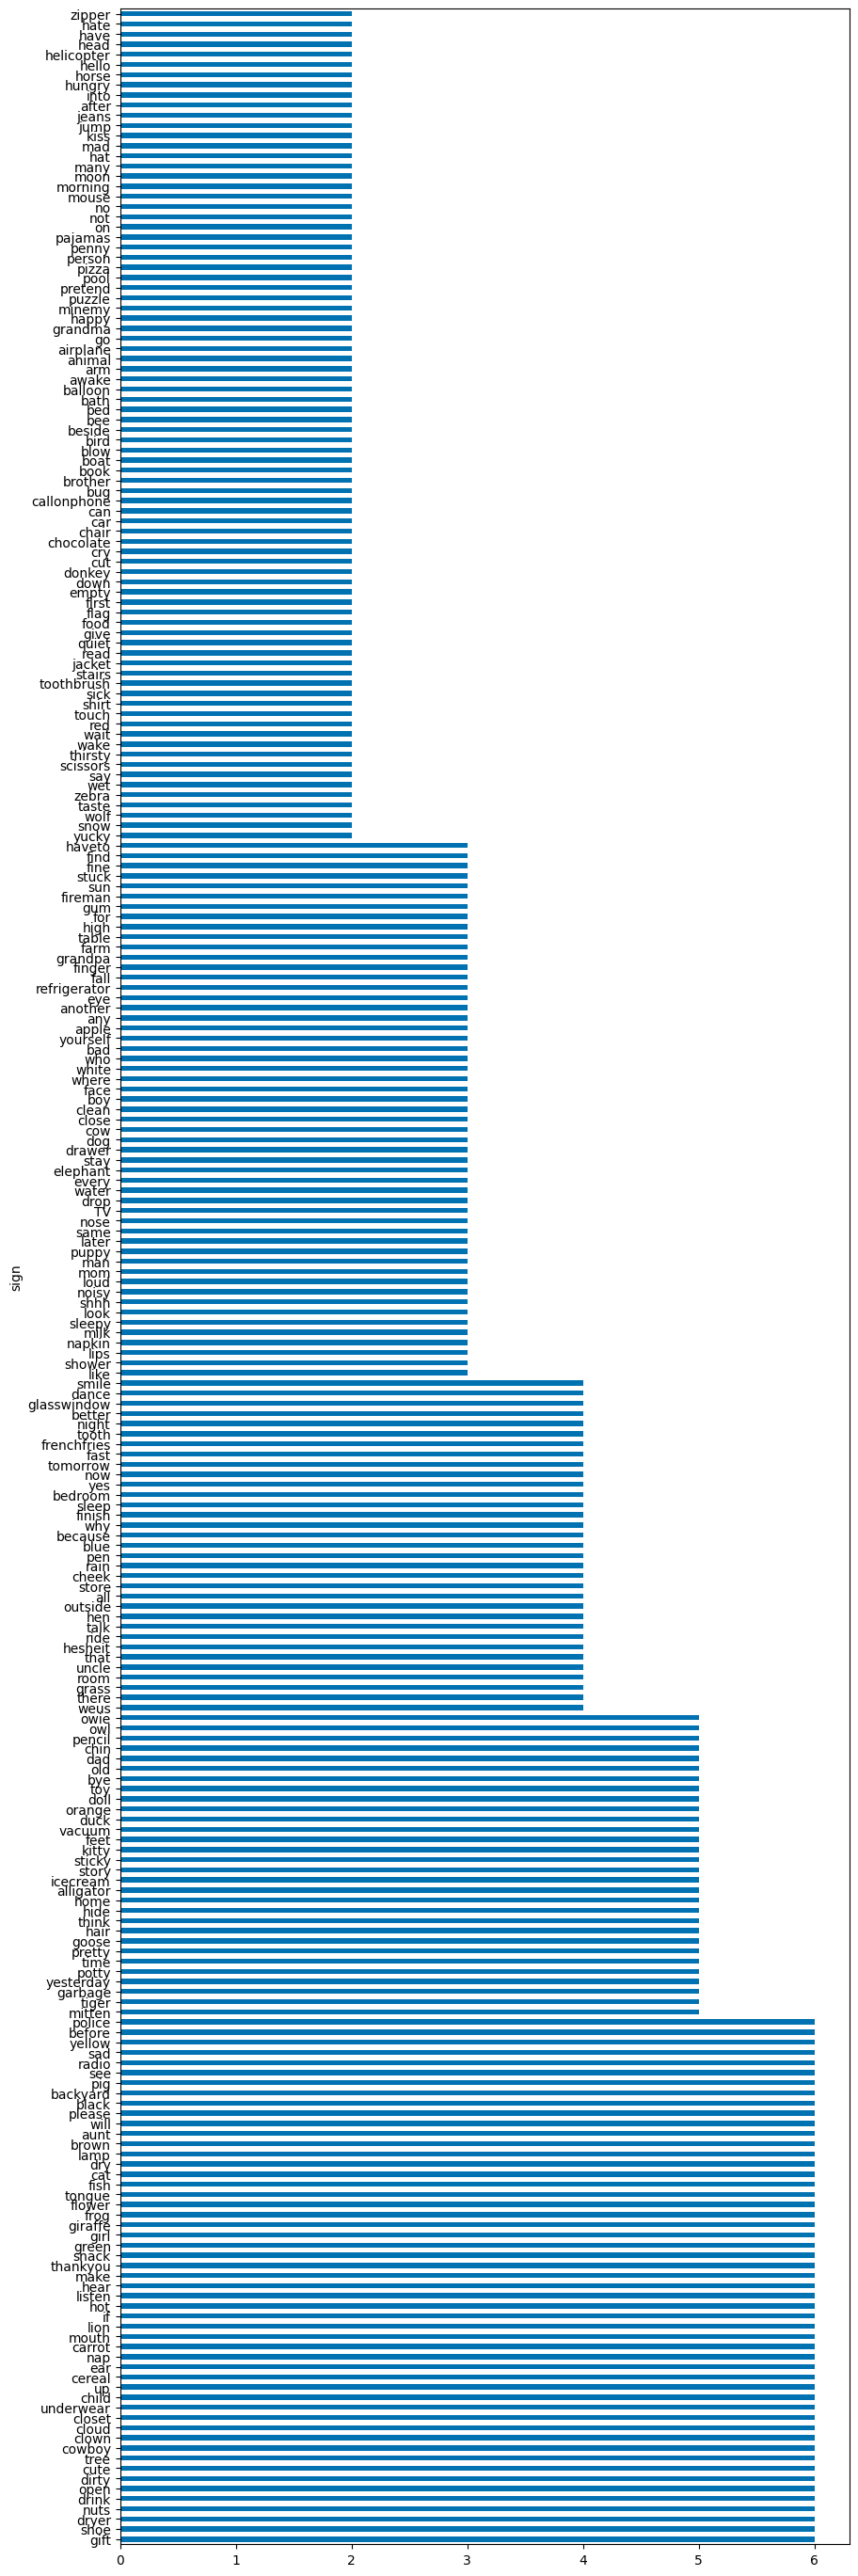

In [43]:
frame_descr["min"].sort_values(ascending=False).plot(kind="barh", figsize=(10, 35))

<AxesSubplot:ylabel='sign'>

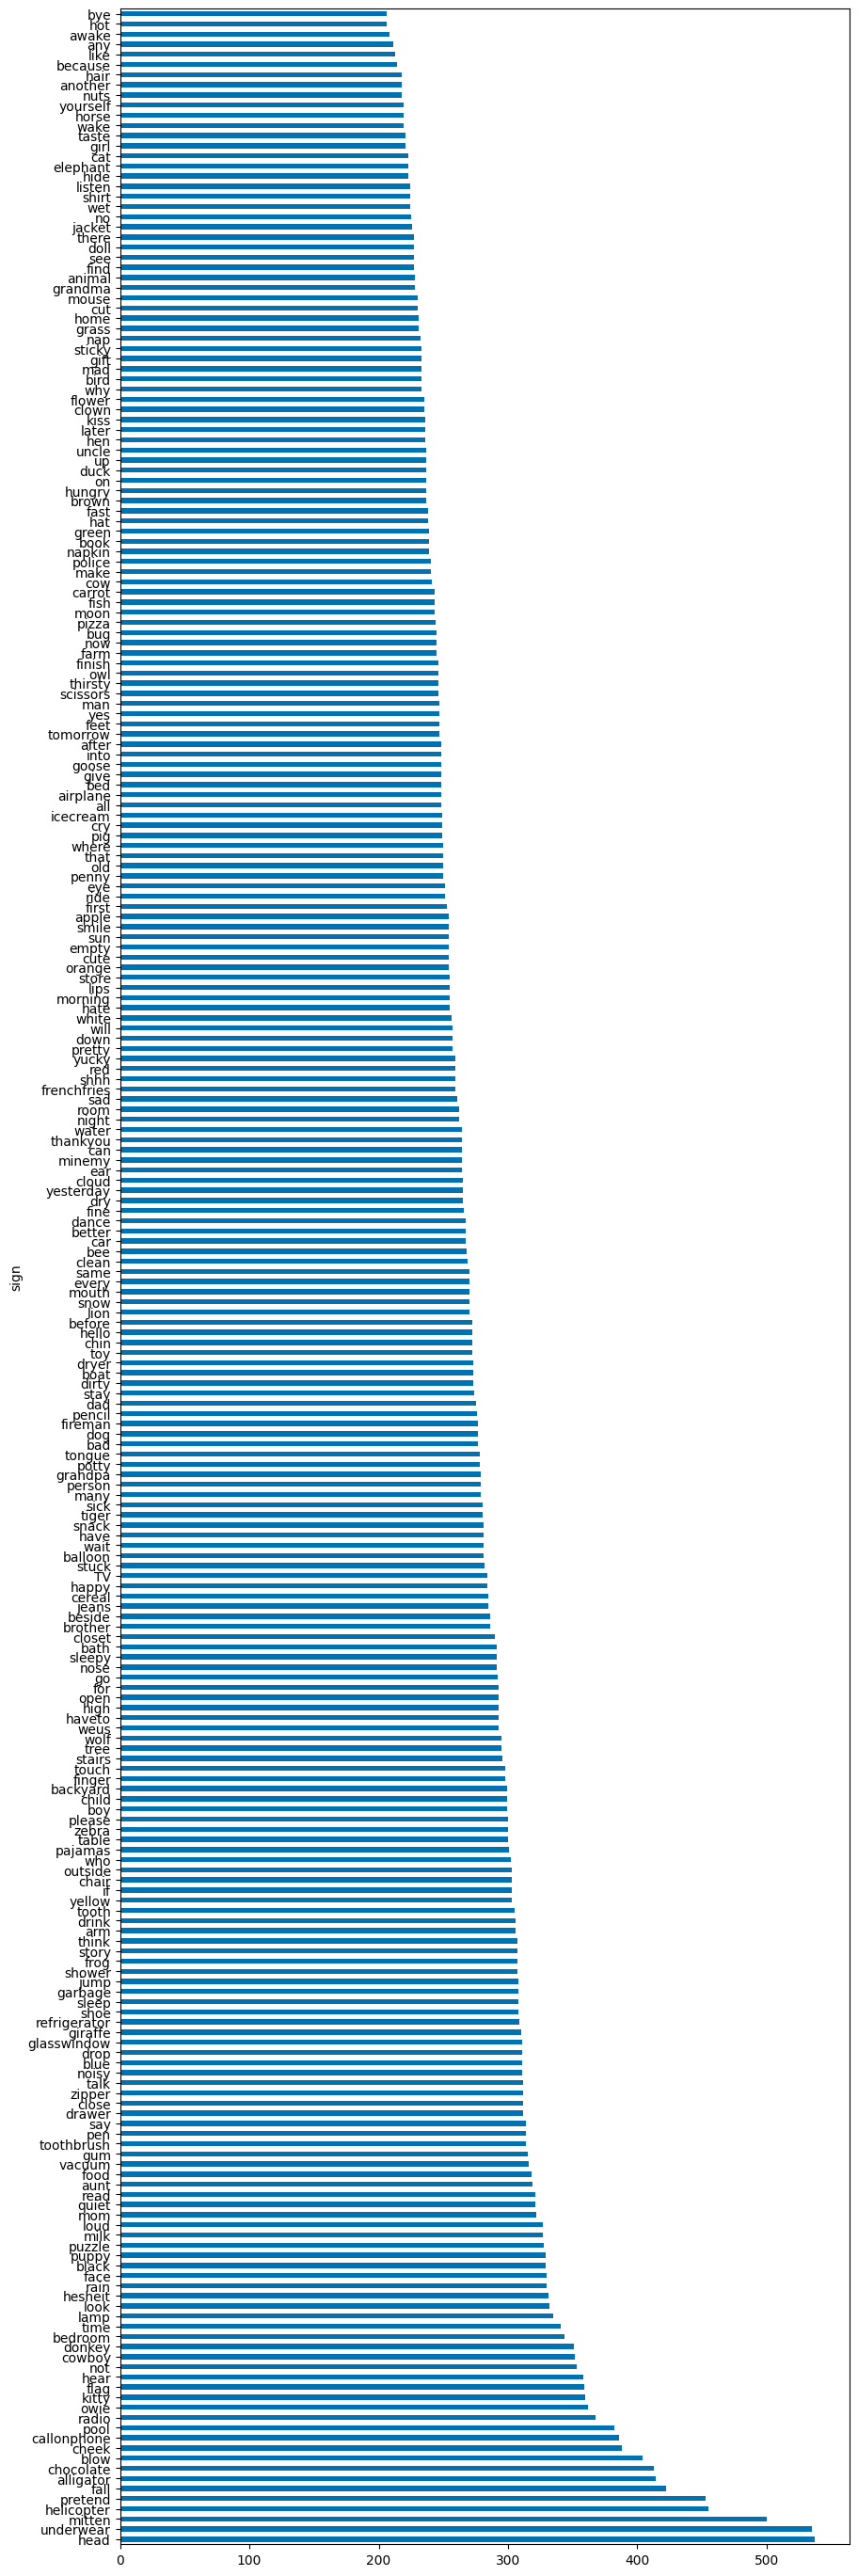

In [44]:
frame_descr["max"].sort_values(ascending=False).plot(kind="barh", figsize=(10, 35))

<AxesSubplot:ylabel='sign'>

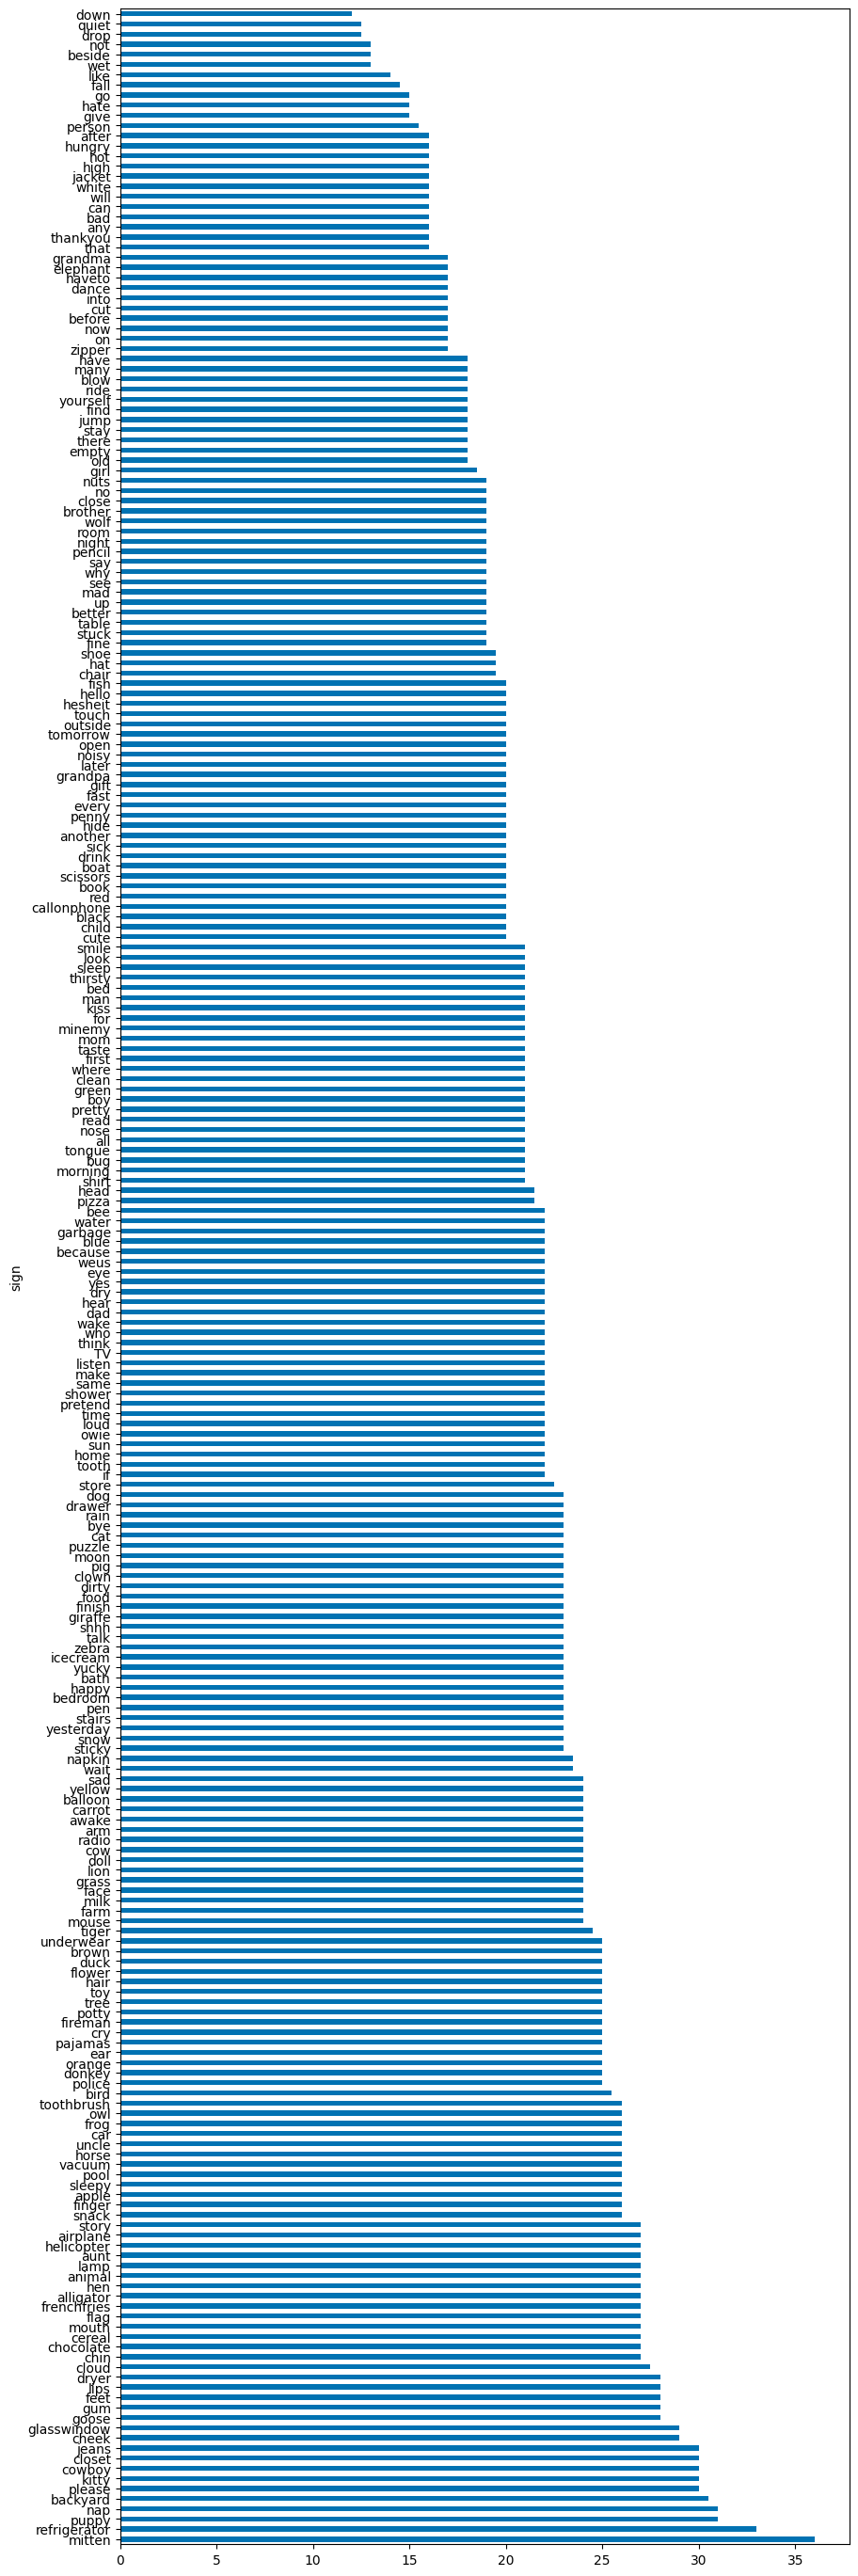

In [45]:
frame_descr["50%"].sort_values(ascending=False).plot(kind="barh", figsize=(10, 35))

In [38]:
frame_descr["min"].describe()

count    250.000000
mean       3.668000
std        1.541193
min        2.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: min, dtype: float64

In [39]:
frame_descr["max"].describe()

count    250.000000
mean     279.288000
std       52.026301
min      206.000000
25%      245.000000
50%      270.000000
75%      304.500000
max      537.000000
Name: max, dtype: float64

In [40]:
frame_descr["50%"].describe()

count    250.000000
mean      21.862000
std        3.990193
min       12.000000
25%       19.125000
50%       22.000000
75%       24.000000
max       36.000000
Name: 50%, dtype: float64